# ASSIGNMENT 1 : PLAYSTORE EDA IN PYTHON
# SUBMITTED BY : RAHUL PRADHAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CSV files/playstore-analysis.csv'
playstore_data = pd.read_csv(path)

In [ ]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 1)Data clean up - Missing Value Treatment


### a) Drop the records where rating is missing since rating is the target study

In [ ]:
playstore_data.dropna(how='any', subset=['Rating'], axis = 0, inplace = True)

In [ ]:
playstore_data.Rating.isnull().sum()

0

### b) Checking the null values for Andoroid Ver column

In [ ]:
playstore_data.loc[playstore_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### i) The above three records have the same problem & all of them are having values NaN

#### ii) Drop the 3rd record i.e. record for “Life Made WIFI ...”

In [ ]:
playstore_data.drop([10472], inplace = True)

In [ ]:
playstore_data.loc[playstore_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii) Replace remaining missing values with the mode

In [ ]:
playstore_data.fillna(playstore_data['Android Ver'].mode()[0], inplace = True)


### c) Current ver – replace with most common value

In [ ]:
playstore_data.fillna(playstore_data['Current Ver'].mode()[0], inplace = True)

# 2. Data clean up – correcting the data types

### a) Which all variables need to be brought to numeric types?

In [ ]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

So after analysing datatypes of the each column the variables that are need to be brought back to numeric types are : Reviews, Price, Install

### b) Price variable – remove $ sign and convert to float

In [ ]:
playstore_data['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9366, dtype: object

In [ ]:
price = []
for i in playstore_data['Price']:
  if i[0] == '$':
    price.append(i[1:])
  else:
    price.append(i)

In [ ]:
playstore_data['Price'] = price #Removing $ sign from column Price

In [ ]:
playstore_data.drop(labels = playstore_data[playstore_data['Price']=='Everyone'].index, inplace = True) # Removing the row which contains Everyone as value in column Price

In [ ]:
playstore_data['Price'] = playstore_data['Price'].astype('float')

In [ ]:
playstore_data['Price'].dtypes

dtype('float64')

### c) Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [ ]:
install = []
for i in playstore_data['Installs']:
  install.append(i.replace(',', '').replace('+', ''))

playstore_data['Installs'] = install
playstore_data["Installs"] = playstore_data["Installs"].astype('int')

In [ ]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore_data['Installs'].dtypes

dtype('int64')

### d) Convert all other identified columns to numeric

In [ ]:
playstore_data['Reviews'] = playstore_data["Reviews"].astype('int')
playstore_data['Reviews'].dtypes

dtype('int64')

# 3. Sanity checks – check for the following and handle accordingly

### a) Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

#### i) Are there any such records? Drop if so.

In [ ]:
playstore_data['Rating'].loc[playstore_data['Rating'] < 1] | playstore_data['Rating'].loc[playstore_data['Rating'] > 5]

Series([], Name: Rating, dtype: bool)

### b) Reviews should not be more than installs as only those who installed can review the app.

#### i) Are there any such records? Drop if so.

In [ ]:
playstore_data.loc[playstore_data['Reviews'] > playstore_data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [ ]:
temp_indexes = playstore_data[playstore_data['Reviews'] > playstore_data['Installs']].index

In [ ]:
print(temp_indexes)

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')


In [ ]:
playstore_data.drop(temp_indexes, inplace = True)

In [ ]:
playstore_data.loc[playstore_data['Reviews'] > playstore_data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4. Identify and handle outliers –

### a) Price column

#### i) Make suitable plot to identify outliers in price

{'boxes': [<matplotlib.lines.Line2D at 0x7f0862f33a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0862f41b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0862f47b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0862f47610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0862f41090>,
  <matplotlib.lines.Line2D at 0x7f0862f415d0>]}

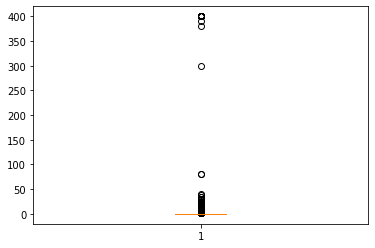

In [ ]:
plt.boxplot(playstore_data['Price'])

#### ii) Do you expect apps on the play store to cost $200? Checkout these cases

In [ ]:
playstore_data.loc[playstore_data['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### Yes we can expect the price of some apps on play store >= $200

#### iii) Limit data to records with price < $30

In [ ]:
check_30 = playstore_data[playstore_data['Price']>30].index
check_30

Int64Index([2253, 2301, 2365, 2402, 2414, 4197, 4362, 4367, 5351, 5354, 5355,
            5356, 5357, 5358, 5359, 5360, 5362, 5364, 5366, 5369, 5373],
           dtype='int64')

In [ ]:
playstore_data.drop(check_30, inplace = True)

In [ ]:
count = playstore_data[playstore_data['Price']> 30].index
count.value_counts().sum()

0

#### iv) After dropping the useless records, make the suitable plot again to identify outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f0862a2dc50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0862a34cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0862a39d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0862a397d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0862a34250>,
  <matplotlib.lines.Line2D at 0x7f0862a34790>]}

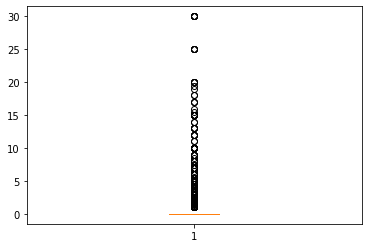

In [ ]:
plt.boxplot(playstore_data['Price'])

## b) Reviews column

### i) Make suitable plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


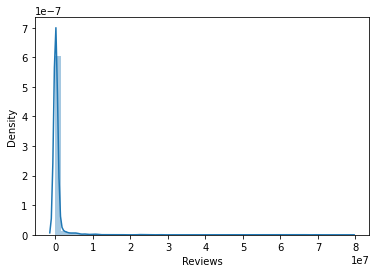

In [ ]:
sns.distplot(playstore_data['Reviews'])
plt.show()

#### ii) Limitdatatoappswith<1Millionreviews

In [ ]:
limit_1m = playstore_data[playstore_data['Reviews']>1000000].index
playstore_data.drop(limit_1m, inplace = True)

In [ ]:
print(limit_1m.value_counts().sum(),'col dropped')

704 col dropped


## c) Installs

#### i) What is the 95th percentile of the installs?

In [ ]:
percentile = playstore_data['Installs'].quantile(0.95)
print(percentile, 'is the 95th percentile')

10000000.0 is the 95th percentile


#### ii) Drop records having a value more than the 95th percentile

In [ ]:
per = playstore_data[playstore_data['Installs'] > percentile].index
playstore_data.drop(per, inplace = True)

# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

#### a) How do you explain this?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


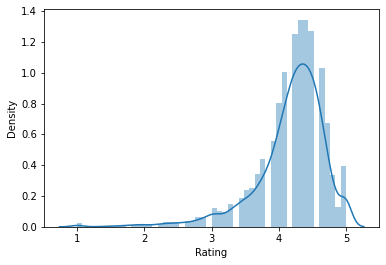

In [ ]:
sns.distplot(playstore_data['Rating'])

In [ ]:
print('The skewness of the distribution is', playstore_data['Rating'].skew())

The skewness of the distribution is -1.7434270330647985


The distribution of ratings is more skewed towards lower value

#### b) What is the implication of this on your analysis?

In [ ]:
print('Mean of the distribution of rating is: ', playstore_data['Rating'].mean())
print('Median of the distribution of rating is: ', playstore_data['Rating'].median())
print('Mode of the distribution of rating is: ', playstore_data['Rating'].mode()[0])

Mean of the distribution of rating is:  4.170800237107298
Median of the distribution of rating is:  4.3
Mode of the distribution of rating is:  4.3


Since Mean < Median <= Mode, Thus the distribution is negatively skewed. Therefore the rating is more skewed towards lower values.  

## 6) What are the top Content Rating values?

#### a) Are there any values with very few records?

In [ ]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [ ]:
playstore_data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Yes there are records with less content rating like Adults only 18+ and Unrated

#### b) If yes, drop those as they won’t help in the analysis

In [ ]:
temp1 = playstore_data.loc[playstore_data['Content Rating'] == 'Adults only 18+'].index
temp2 = playstore_data.loc[playstore_data['Content Rating'] == 'Unrated'].index

In [ ]:
print(temp1)
print(temp2)

Int64Index([298, 3043, 6424], dtype='int64')
Int64Index([8266], dtype='int64')


In [ ]:
playstore_data.drop(temp1, inplace = True)
playstore_data.drop(temp2, inplace = True)

In [ ]:
playstore_data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## 7) Effect of size on rating

#### a) Make a joinplot to understand the effect of size on rating

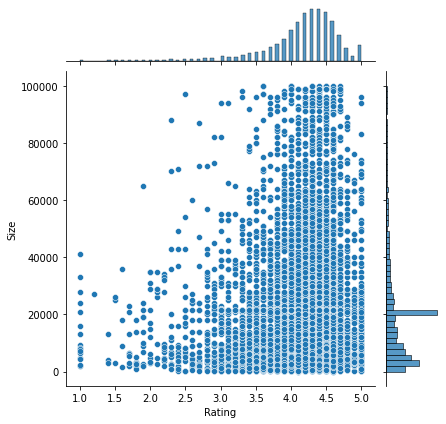

In [ ]:
sns.jointplot(x = playstore_data['Rating'], y = playstore_data['Size'], kind = 'scatter')

#### b) Do you see any patterns?

Yes, pattern can be observed between Rating and Size and it seems they are positively correlated

In [ ]:
corr,_ = pearsonr(playstore_data['Rating'], playstore_data['Size'])
print('Correlation between Rating and Size is: %.3f' % corr)

Correlation between Rating and Size is: 0.058


Thus there is positive correlation of app size and ratings with the magnitude of 0.058. Hence as th ratings increases the app size also increases.

#### c) How do you explain the pattern?

We can analyse that as the size is increasing the rating of the App is also increasing, we can say that the more the size of an App a lot of features are added and so on.. so the Ratings are higher

## 8) Effect of Price on Rating

### a) Make a jointplot (with regression line)

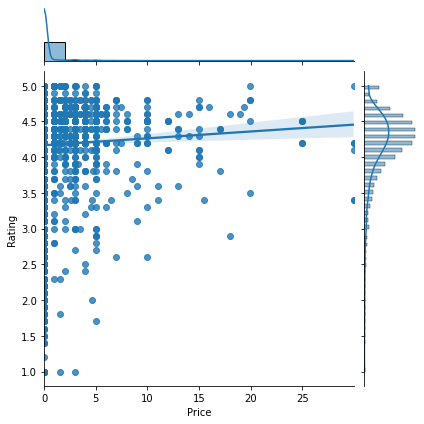

In [ ]:
sns.jointplot(x = playstore_data['Price'], y = playstore_data['Rating'], kind='reg')

### b) What pattern do you see?

Basically on increasing the Price, Rating greater than 4 almost remains constant

### c) How do you explain the pattern?

On increasing the price the rating almost remains constant. So there is a weak positive correlation between Price and Rating.

In [ ]:
playstore_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


We can also see there is a weak positive correlation between price and rating with a magnitude of 0.031479

### d) Replot the data, this time with only records with price > 0

In [ ]:
df1 = playstore_data.loc[playstore_data['Price']>0] #Now dataframe df1 will contain all records of apps where price of application is greater than zero

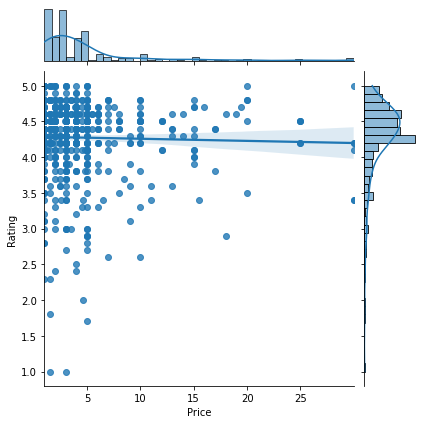

In [ ]:
sns.jointplot(x = df1['Price'], y = df1['Rating'], kind = 'reg')

## e) Does the pattern change?

Yes,on making pairplot between price and rating having price of app>0. I observed that there is a weak negative correlation
between price and rating i.e as the price increases rating decreases. We can also verify it' correlation too by:-

In [ ]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


Thus we observe a negative correlation between price and rating with a magnitude of -0.025975

## f) What is your overall inference on the effect of price on the rating

Generally on increasing the price the rating increases but a very slow rate i.e very weak positive relation with a magnitude of 0.031479

# 9) Look at all the numeric interactions together –

### a) Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


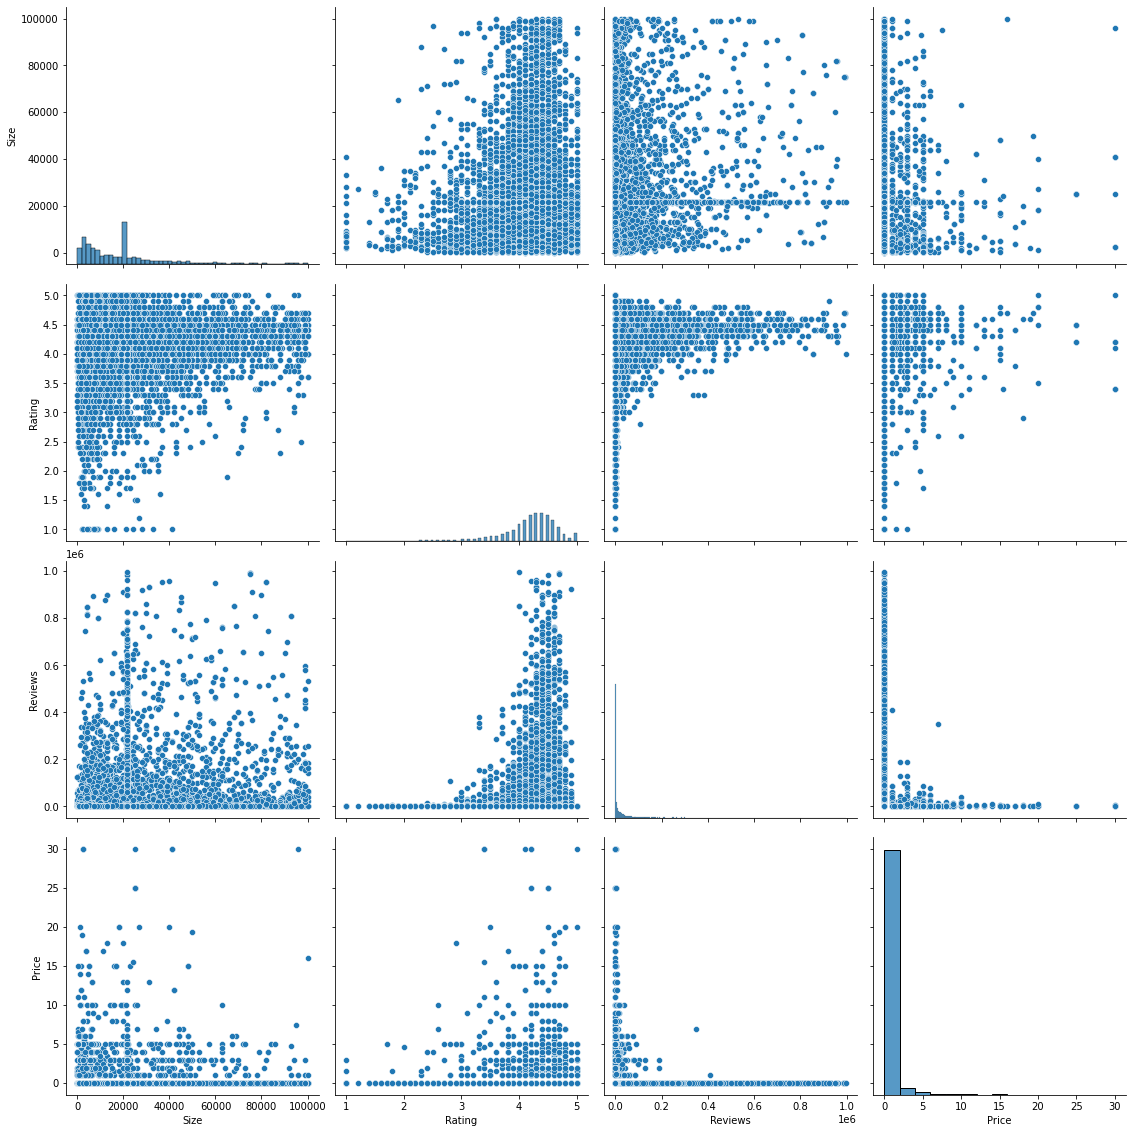

In [ ]:
sns.pairplot(playstore_data, vars = ['Size', 'Rating', 'Reviews', 'Price'], height = 4 )

## 10) Rating vs. content rating

### a) Make a bar plot displaying the rating for each content rating

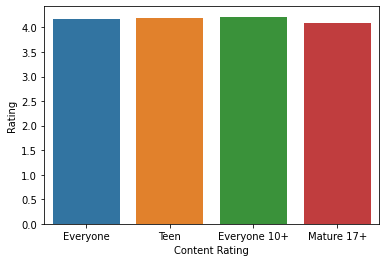

In [ ]:
sns.barplot(x = playstore_data['Content Rating'], y = playstore_data['Rating'], ci = None)

### b) Which metric would you use? Mean? Median? Some other quantile?

#### We will use mean since we already removed the outliers

In [ ]:
playstore_data.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Everyone        4.169242
Everyone 10+    4.218675
Mature 17+      4.099760
Teen            4.197444
Name: Rating, dtype: float64

## 11) Content rating vs. size vs. rating – 3 variables at a time

### a) Create 5 buckets (20% records in each) based on Size

In [ ]:
bins = [0, 20000, 40000, 60000, 80000, 100000]
playstore_data['Bucket Size'] = pd.cut(playstore_data['Size'], bins, labels = ['0k-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k'])

In [ ]:
pd.pivot_table(playstore_data, values = 'Rating', index = 'Bucket Size', columns = 'Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0k-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


### b) By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [ ]:
CRvsSB = pd.pivot_table(playstore_data, values = 'Rating', index = 'Bucket Size', columns = 'Content Rating', aggfunc = lambda x:np.percentile(x, 20))

In [ ]:
CRvsSB

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0k-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


### c) Make a heatmap of this

#### i) Annotated

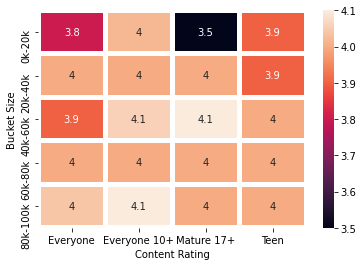

In [ ]:
sns.heatmap(CRvsSB, annot = True, linewidths = 4)

#### ii) Greenscolormap

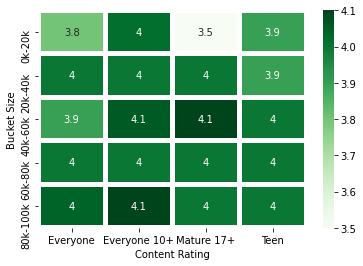

In [ ]:
sns.heatmap(CRvsSB, annot = True, linewidths = 4, cmap = 'Greens')

### d) What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

My inference is that there's nothing like lighter or heavier apps are prefered but the heatmap shows that apps between 40k - 60k apps have good rating as compared to other size apps.